## Introduction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../Datafiles/autos.csv", encoding='latin1')

In [3]:
data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

In [5]:
data.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [6]:
data.columns = [
    'date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen'
]

In [7]:
data.head(1)

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54


In [8]:
data.describe(include='all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-22 09:51:06,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


In [9]:
data['seller'].value_counts()

privat        49999
gewerblich        1
Name: seller, dtype: int64

In [10]:
data['nr_of_pictures'].value_counts(dropna=False)

0    50000
Name: nr_of_pictures, dtype: int64

In [11]:
data = data.drop(['seller', 'offer_type', 'nr_of_pictures'], axis=1)

In [12]:
data['price'].unique()

array(['$5,000', '$8,500', '$8,990', ..., '$385', '$22,200', '$16,995'],
      dtype=object)

In [13]:
data['odometer'].unique()

array(['150,000km', '70,000km', '50,000km', '80,000km', '10,000km',
       '30,000km', '125,000km', '90,000km', '20,000km', '60,000km',
       '5,000km', '100,000km', '40,000km'], dtype=object)

In [14]:
data['price'] = (data.price
                    .str.replace('$', '')
                    .str.replace(',', '')
                    .astype(float)                
                )

data['odometer'] = (data.odometer
                    .str.replace('km', '')
                    .str.replace(',', '')
                    .astype(float)                
                )

In [15]:
data.rename({'odometer': 'odometer_km'}, axis=1, inplace=True)

<h2>Exploring price and odometer_km columns<h2>

In [16]:
data.price.unique().shape
data.odometer_km.unique().shape
data[['price', 'odometer_km']].describe()

,price,odometer_km
count,5.000000e+04,50000.000000
mean,9.840044e+03,125732.700000
std,4.811044e+05,40042.211706
min,0.000000e+00,5000.000000
25%,1.100000e+03,125000.000000
50%,2.950000e+03,150000.000000
75%,7.200000e+03,150000.000000
max,1.000000e+08,150000.000000


In [17]:
data.price.value_counts().sort_index()

0.0           1421
1.0            156
2.0              3
3.0              1
5.0              2
8.0              1
9.0              1
10.0             7
11.0             2
12.0             3
13.0             2
14.0             1
15.0             2
17.0             3
18.0             1
20.0             4
25.0             5
29.0             1
30.0             7
35.0             1
40.0             6
45.0             4
47.0             1
49.0             4
50.0            49
55.0             2
59.0             1
60.0             9
65.0             5
66.0             1
              ... 
151990.0         1
155000.0         1
163500.0         1
163991.0         1
169000.0         1
169999.0         1
175000.0         1
180000.0         1
190000.0         1
194000.0         1
197000.0         1
198000.0         1
220000.0         1
250000.0         1
259000.0         1
265000.0         1
295000.0         1
299000.0         1
345000.0         1
350000.0         1
999990.0         1
999999.0    

In [18]:
data = data[data['price'].between(1, 350000)]

In [19]:
data['odometer_km'].value_counts().sort_index()

5000.0        836
10000.0       253
20000.0       762
30000.0       780
40000.0       815
50000.0      1012
60000.0      1155
70000.0      1217
80000.0      1415
90000.0      1734
100000.0     2115
125000.0     5057
150000.0    31414
Name: odometer_km, dtype: int64

<h2> Exploring Dates <h2>

In [20]:
data[['date_crawled','ad_created','last_seen']].head()

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


In [21]:
data['date_crawled'].str[:10].value_counts(normalize=True, dropna=False).sort_index()

2016-03-05    0.025327
2016-03-06    0.014043
2016-03-07    0.036014
2016-03-08    0.033296
2016-03-09    0.033090
2016-03-10    0.032184
2016-03-11    0.032575
2016-03-12    0.036920
2016-03-13    0.015670
2016-03-14    0.036549
2016-03-15    0.034284
2016-03-16    0.029610
2016-03-17    0.031628
2016-03-18    0.012911
2016-03-19    0.034778
2016-03-20    0.037887
2016-03-21    0.037373
2016-03-22    0.032987
2016-03-23    0.032225
2016-03-24    0.029342
2016-03-25    0.031607
2016-03-26    0.032204
2016-03-27    0.031092
2016-03-28    0.034860
2016-03-29    0.034099
2016-03-30    0.033687
2016-03-31    0.031834
2016-04-01    0.033687
2016-04-02    0.035478
2016-04-03    0.038608
2016-04-04    0.036487
2016-04-05    0.013096
2016-04-06    0.003171
2016-04-07    0.001400
Name: date_crawled, dtype: float64

In [22]:
data['last_seen'].str[:10].value_counts(normalize=True, dropna=False).sort_index()

2016-03-05    0.001071
2016-03-06    0.004324
2016-03-07    0.005395
2016-03-08    0.007413
2016-03-09    0.009595
2016-03-10    0.010666
2016-03-11    0.012375
2016-03-12    0.023783
2016-03-13    0.008895
2016-03-14    0.012602
2016-03-15    0.015876
2016-03-16    0.016452
2016-03-17    0.028086
2016-03-18    0.007351
2016-03-19    0.015834
2016-03-20    0.020653
2016-03-21    0.020632
2016-03-22    0.021373
2016-03-23    0.018532
2016-03-24    0.019767
2016-03-25    0.019211
2016-03-26    0.016802
2016-03-27    0.015649
2016-03-28    0.020859
2016-03-29    0.022341
2016-03-30    0.024771
2016-03-31    0.023783
2016-04-01    0.022794
2016-04-02    0.024915
2016-04-03    0.025203
2016-04-04    0.024483
2016-04-05    0.124761
2016-04-06    0.221806
2016-04-07    0.131947
Name: last_seen, dtype: float64

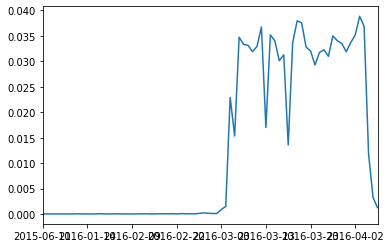

In [23]:
temp = data['ad_created'].str[:10].value_counts(normalize=True, dropna=False).sort_index()
temp
temp.plot();

<h2>Fixing incorrect registration year<h2>

In [24]:
data['registration_year'].describe()

count    48565.000000
mean      2004.755421
std         88.643887
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

In [25]:
data['registration_year'].between(1900, 2018).sum()/len(data)

0.9995469988674972

In [26]:
data = data[data['registration_year'].between(1900, 2018)]

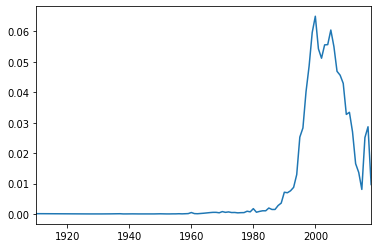

In [27]:
data['registration_year'].value_counts(normalize=True).sort_index().plot()
plt.show()

<h2>Exploring Price by brand<h2>

In [28]:
data['brand'].value_counts(normalize=True)

volkswagen        0.212822
opel              0.108646
bmw               0.108646
mercedes_benz     0.095791
audi              0.085862
ford              0.069670
renault           0.047896
peugeot           0.029458
fiat              0.025998
seat              0.018932
skoda             0.016068
nissan            0.015265
mazda             0.015224
smart             0.014297
citroen           0.014111
toyota            0.012587
hyundai           0.009950
sonstige_autos    0.009641
volvo             0.009044
mini              0.008611
mitsubishi        0.008178
honda             0.007972
kia               0.007107
alfa_romeo        0.006592
porsche           0.005912
suzuki            0.005892
chevrolet         0.005665
chrysler          0.003481
dacia             0.002657
daihatsu          0.002513
jeep              0.002204
subaru            0.002101
land_rover        0.002039
saab              0.001627
daewoo            0.001566
jaguar            0.001524
trabant           0.001380
r

In [29]:
top_6 = data['brand'].value_counts(normalize=True).index[:6]
brand_prices = {}
for brand in top_6:
    group = data[data['brand'] == brand]
    brand_prices[brand] = int(group['price'].mean())

In [30]:
for brand in sorted(brand_prices, key=brand_prices.get):
    print(brand, brand_prices[brand])

opel 2941
ford 3728
volkswagen 5333
bmw 8261
mercedes_benz 8526
audi 9212


In [31]:
auto_top_6 = data[data['brand'].isin(top_6)]
auto_top_6[['brand', 'registration_year']].groupby('brand').mean()

,registration_year
brand,
audi,2004.554223
bmw,2003.406143
ford,2003.277942
mercedes_benz,2002.513118
opel,2002.941411
volkswagen,2003.137741


In [32]:
brand_mileage = {}

for brand in top_6:
    group = data[data['brand'] == brand]
    brand_mileage[brand] = int(group['odometer_km'].mean())

In [33]:
brand_summary = (pd.DataFrame.from_dict(brand_mileage, orient='index')
                .rename(columns = {0: 'mean_milage'})
                )
price_series = pd.Series(brand_prices)
brand_summary['mean_prices'] = price_series
brand_summary.sort_values('mean_prices')

,mean_milage,mean_prices
opel,129452,2941
ford,124349,3728
volkswagen,128955,5333
bmw,132682,8261
mercedes_benz,130848,8526
audi,129492,9212


<h2> Most common brand/model combinations <h2>

In [34]:
group = data['model'].groupby(data['brand']).value_counts()

max_index = group.groupby(level='brand').apply(lambda x: x.idxmax()[1])
max_value = group.groupby(level='brand').apply(lambda x: x.max())
max_value.name = 'model_count'

pd.concat([max_index, max_value], axis=1)

,model,model_count
brand,,
alfa_romeo,156,88
audi,a4,1256
bmw,3er,2686
chevrolet,andere,149
chrysler,andere,52
citroen,andere,230
dacia,sandero,47
daewoo,matiz,24
daihatsu,cuore,66


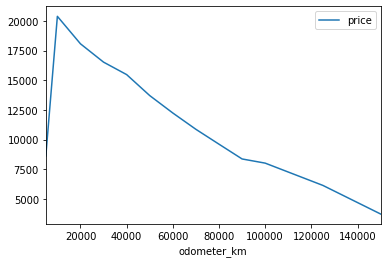

In [35]:
data[['odometer_km', 'price']].corr()
odometer_price = data[['odometer_km', 'price']].groupby('odometer_km').mean()
odometer_price.price.reset_index().corr()
odometer_price.plot()

In [36]:
data.unrepaired_damage.value_counts(dropna=False)

nein    34769
NaN      9085
ja       4689
Name: unrepaired_damage, dtype: int64

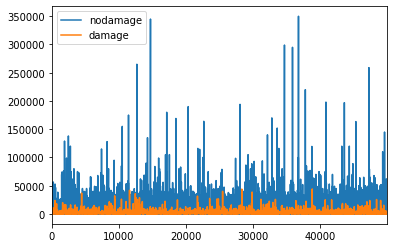

In [37]:
autos_nodamage = data[data.unrepaired_damage == 'nein']
autos_damage = data[data.unrepaired_damage == 'ja']

autos_nodamage.price.plot(label = 'nodamage')
autos_damage.price.plot(label = 'damage')
plt.legend();

In [38]:
data.sample(20)

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
28090,2016-03-08 19:50:06,Tesla_Model_X_P90D_Signature_Sondermodel__Neuw...,194000.0,test,suv,2016,automatik,0,NaN,5000.0,3,elektro,sonstige_autos,nein,2016-03-08 00:00:00,97990,2016-03-16 04:15:31
46891,2016-03-05 21:42:31,Bmw_E34_520i___Motorschaden!,500.0,test,limousine,1989,manuell,129,5er,150000.0,4,NaN,bmw,ja,2016-03-05 00:00:00,84109,2016-03-23 12:47:16
34302,2016-03-11 12:57:04,Verkaufe_oder_tausche_gegen_Golf_4,1150.0,test,kleinwagen,1997,manuell,101,NaN,150000.0,4,benzin,audi,nein,2016-03-11 00:00:00,52351,2016-03-14 09:45:08
1812,2016-04-05 10:53:22,Mercedes__Benz_311CDI_aus_1.Hand_H+L_6_Gang_Gr...,5950.0,control,NaN,2017,manuell,0,sprinter,150000.0,10,diesel,mercedes_benz,NaN,2016-04-05 00:00:00,90768,2016-04-05 11:40:16
18637,2016-03-17 00:43:50,Porsche_Boxster_S_Tiptronic_S_Klappe_Voll_111P...,26900.0,test,cabrio,2008,automatik,295,boxster,150000.0,3,benzin,porsche,nein,2016-03-16 00:00:00,86529,2016-03-18 04:16:30
8101,2016-03-29 10:52:54,Ford_Mustang_mit_deutscher_Zulassung,16490.0,control,NaN,2017,manuell,144,mustang,90000.0,7,benzin,ford,NaN,2016-03-29 00:00:00,4860,2016-04-05 20:18:43
39408,2016-03-20 12:42:31,Bmw_316_mit_neuem_TÜV,750.0,test,coupe,1996,manuell,102,NaN,150000.0,9,NaN,bmw,nein,2016-03-20 00:00:00,89297,2016-03-20 12:42:31
49735,2016-03-25 18:52:21,VW_Golf_1_Cabriolet_Quartett__Tuev_Neu_gemacht,3500.0,test,cabrio,1989,manuell,95,golf,150000.0,3,benzin,volkswagen,nein,2016-03-25 00:00:00,79336,2016-03-26 18:50:04
3769,2016-03-16 09:47:23,Bmw_316_i___Mit_frischem_tuev_2018_Nur_Heute,1250.0,test,limousine,1997,manuell,102,3er,150000.0,0,benzin,bmw,nein,2016-03-16 00:00:00,26419,2016-03-16 09:47:23
6252,2016-03-07 18:58:11,Honda_Jazz_1_4_LS_Automatik,2650.0,control,kleinwagen,2002,automatik,83,jazz,125000.0,12,benzin,honda,nein,2016-03-07 00:00:00,12307,2016-03-10 12:46:14
